# Create Low Lou Field

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle

from zpinn.lowloumag import LowLouMag

In [ ]:
with open('config.json') as config:
    info = json.load(config)

nx = info['nx']
ny = info['ny']
nz = info['nz']
b_norm = info['b_norm']

n = info['n']
m = info['m']
l = info['l']
Phi = eval(info['Phi'])

In [ ]:
input_path = info['input_path']
input_original = os.path.join(input_path, 'original')
os.makedirs(input_original, exist_ok=True)

In [ ]:
b = LowLouMag(bounds=[-1,1,-1,1,0,2],
              resolutions=[nx, ny, nz],
              n=n, m=m, l=l, Phi=Phi)
b.calculate()

ImageData (0x7f02d3c612a0)
  N Cells:      16581375
  N Points:     16777216
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   256, 256, 256
  Spacing:      7.843e-03, 7.843e-03, 7.843e-03
  N Arrays:     3

In [ ]:
b_bottom = np.array(b.b_bottom)
b.bottom

PolyData (0x7f02a39d7640)
  N Cells:    65025
  N Points:   65536
  N Strips:   0
  X Bounds:   -1.000e+00, 1.000e+00
  Y Bounds:   -1.000e+00, 1.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   5

<matplotlib.image.AxesImage>

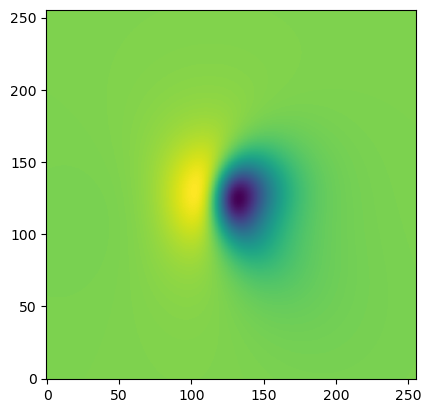

In [ ]:
plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower')

In [ ]:
b_bottom_original_path = os.path.join(input_original, "b_bottom_original.pickle")

with open(b_bottom_original_path,"wb") as f:
    pickle.dump(b_bottom, f)

In [ ]:
b_path = os.path.join(input_original, "b.pickle")

with open(b_path,"wb") as f:
    pickle.dump(b, f)

In [ ]:
bv_path = os.path.join(input_original, "bv.pickle")
bv = b.grid['B']

with open(bv_path,"wb") as f:
    pickle.dump(bv, f)

# 